In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns


# Models of causal exposure and identification criteria for conditioning estimators

## Conditioning and directed graphs

<img src="material/backdoor_path.png" height=300 width=300 />

This graph is an example where a simple mean-comparison between the treatend and untreated is not informative on the effect of the treatment.

#### Illustration of collider variables

We introduced collider variables earlier. However, they will play a very important role going forward and thus we study in an illustration how conditioong in a **collider** induces a conditional association between two unconditinally unassociated variables.

In [8]:
# SAT scores and individual motivation are uncorrelated in the population
SAT = np.random.normal(loc=1, scale=1, size=250)
motivation = np.random.normal(loc=1, scale=1, size=250)

# Both toghether determine college admission
score = SAT + motivation
cutoff = np.percentile(score, 85)
is_admitted = score > cutoff

# For further processing we create a data frame.
data = np.array([SAT, motivation, is_admitted]).T
columns = ['SAT', 'motivation', 'admission']
df = pd.DataFrame(data=data, columns=columns)
df.head()

,SAT,motivation,admission
0,0.268793,2.127841,0.0
1,0.504700,1.374170,0.0
2,0.920905,1.265601,0.0
3,0.653926,1.380383,0.0
4,2.431165,1.685028,1.0


The Pearson correlation coefficient is   0.003


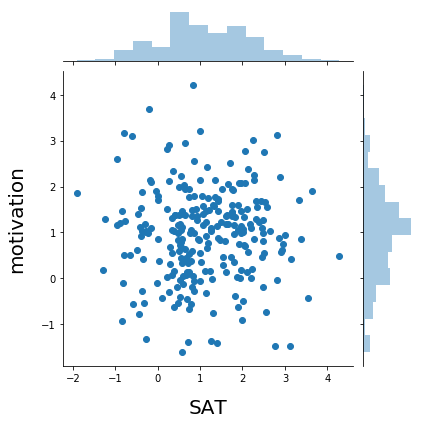

In [9]:
sns.jointplot('SAT', 'motivation', df);
print('The Pearson correlation coefficient is {:7.3f}'.format(stats.pearsonr(df['SAT'], df['motivation'])[0]))

What happens if we conidition on college admittance $C$, i.e. on a collider variable?

The Pearson correlation coefficient is  -0.693


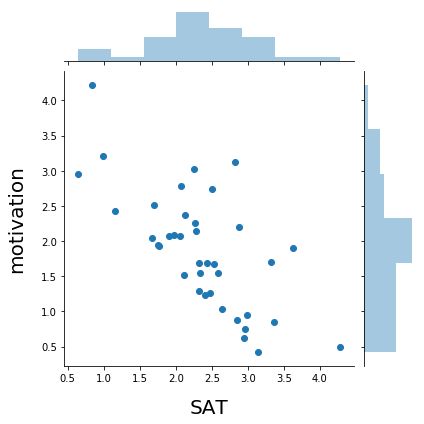

In [10]:
df_admitted = df[is_admitted]
sns.jointplot('SAT', 'motivation', df_admitted);
print('The Pearson correlation coefficient is {:7.3f}'.format(stats.pearsonr(df_admitted['SAT'], df_admitted['motivation'])[0]))

Let us practice our understanding for some interesting graph structures. The backdoor algorithm is also available [here](https://nbviewer.jupyter.org/github/HumanCapitalAnalysis/microeconometrics/blob/master/lectures/04_criteria_conditioning_estimators/back_door_algorithm.ipynb) for your reference.

We will now work through two examples where we focus on only the first conditions of the back-door criterion.

* Let"s start with a simple example and apply the idea of back-door identification to a graph where we consider on conditioning on a lagged outcome varaiable $Y_{t -1}$.

<img src="material/backdoor_example_1.png" height=500 width=500 />

Now, let's evalaute the a couple of potential conditioning sets.

* $\{F\}$
* $\{A\}$
* $\{A, B\}$



<img src="material/backdoor_example_2.png" height=500 width=500 />

Finally, let's focus on the second condition.

* **Condition 2** No variables in $Z$ are decendents of the causal variable that lie on (or decend from other variables that lie on) any of the directed paths that begin at the causal variable and reach the outcome variable.

We first look at a graph that illustrates what a descendent is and remind ourselves of the difference between a direct and an indirect effect.

<img src="material/backdoor_indirect_effect.png" height=400 width=400 />

Let's evaluate the following conditioning sets: $\{O, B\}$.

<img src="material/backdoor_condition_2.png" height=300 width=300 />

## Models of causal exposure and point identification based on potential outcome model

### Treatment assignment modeling in statistics

<img src="material/assignment_statistics.png" height=500 width=500 />

### Treatment assignment modeling in econometrics

<img src="material/assignment_econometrics.png" height=500 width=500 />

###  Conditioning ot balance and conditioning to adjust

There exists only one back-door path $D \leftarrow S \leftrightarrow X \rightarrow Y$ and both $S$ nor $X$ are observable. Thus, we have a choice to condition on either one of them.

<img src="material/conditioning_balance_adjust.png" height=300 width=300 />

* $X$, regression estmiator, adjustment-for-other-causes conditioning strategy
* $S$, matching estimator, balancing conditioning strategy